In [75]:
import pandas as pd

read_data = pd.read_csv('news_data.csv' , encoding='iso-8859-1') 
df = pd.DataFrame(read_data)

df.head(5)

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


#### Change Columns Name to Sentiment and Message

In [76]:
# { 'neutral' change to --> : 'sentiment' and 'According'  change to --> : 'message' }

df = df.rename(columns={'neutral' : 'sentiment' ,'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .' :'message'} )

df.head(5)

,sentiment,message
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['message'])
y = df['sentiment']

vectorizer.get_feature_names_out()

print(X.shape)

df.info()


(4845, 10070)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  4845 non-null   object
 1   message    4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


### Check All value of Sentiment

In [78]:
df['sentiment'].value_counts()

sentiment
neutral     2878
positive    1363
negative     604
Name: count, dtype: int64

### Check null

In [79]:
df.isnull().sum()

sentiment    0
message      0
dtype: int64

### Make a Balance

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Separate features (X) and target labels (y)
X = df['message']
y = df['sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


# Print the class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000000)  # You can adjust the number of features

# Fit and transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Print the class distribution after SMOTE
print("\nClass distribution after SMOTE:")
print(y_train_resampled.value_counts())



Class distribution before SMOTE:
sentiment
neutral     1725
positive     808
negative     374
Name: count, dtype: int64

Class distribution after SMOTE:
sentiment
neutral     1725
positive    1725
negative    1725
Name: count, dtype: int64


### Before Balance

Before Balancing the data :


<Axes: xlabel='sentiment'>

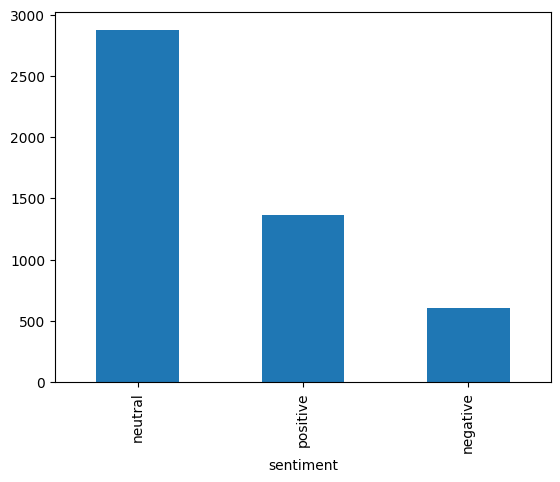

In [81]:
print('Before Balancing the data :')
y.value_counts().plot.bar()

### After balance

After balancing the data :


<Axes: xlabel='sentiment'>

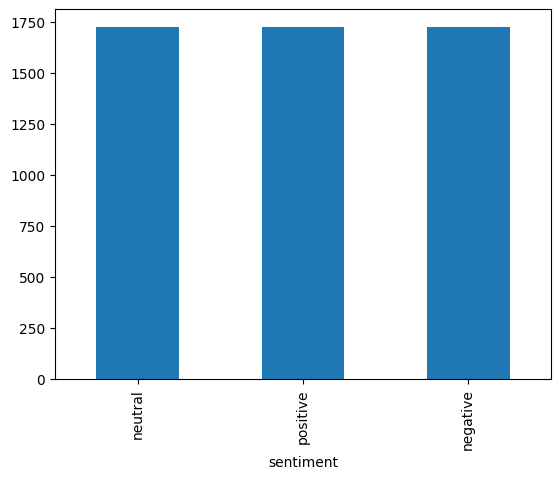

In [82]:
print('After balancing the data :')
y_train_resampled.value_counts().plot.bar()

## LIB

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

### KNN

In [84]:
# Define the K-NN pipeline
knn_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Train the K-NN model on the TF-IDF transformed data
knn_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the TF-IDF transformed test data
y_pred_knn = knn_pipeline.predict(X_test_tfidf)

# Evaluate the K-NN model's performance
print("K-NN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("K-NN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



K-NN Classification Report:
              precision    recall  f1-score   support

    negative       0.14      0.70      0.24       230
     neutral       0.91      0.06      0.11      1153
    positive       0.38      0.51      0.43       555

    accuracy                           0.26      1938
   macro avg       0.48      0.42      0.26      1938
weighted avg       0.66      0.26      0.22      1938

K-NN Confusion Matrix:
[[160   5  65]
 [691  67 395]
 [271   2 282]]


In [85]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Calculate accuracy for the K-NN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-NN Accuracy: {accuracy_knn:.2f}")

# Calculate ROC AUC for the K-NN model for a multi-class problem
y_prob_knn = knn_pipeline.predict_proba(X_test_tfidf)

# Calculate the ROC AUC for each class
roc_auc_knn = roc_auc_score(y_test, y_prob_knn, multi_class='ovr', average='macro')
print(f"K-NN ROC AUC (One-vs-Rest): {roc_auc_knn:.2f}")


K-NN Accuracy: 0.26
K-NN ROC AUC (One-vs-Rest): 0.60


## LR

In [86]:
# Logistic Regression
LR_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('logReg', LogisticRegression(penalty="l2", C=0.001))
])

# Logistic Regression
LR_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_lr = LR_pipeline.predict(X_test_tfidf)
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.54      0.56      0.55       230
     neutral       0.77      0.80      0.79      1153
    positive       0.62      0.55      0.58       555

    accuracy                           0.70      1938
   macro avg       0.64      0.64      0.64      1938
weighted avg       0.70      0.70      0.70      1938

Logistic Regression Confusion Matrix:
[[128  78  24]
 [ 62 927 164]
 [ 49 201 305]]


In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Make predictions with the LR model
y_pred_lr = LR_pipeline.predict(X_test_tfidf)
y_prob_lr = LR_pipeline.predict_proba(X_test_tfidf)

# Calculate accuracy for the LR model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

# Calculate the ROC AUC for each class
roc_auc_lr = []
for i in range(len(LR_pipeline.classes_)):
    y_true_i = [1 if label == LR_pipeline.classes_[i] else 0 for label in y_test]
    roc_auc_i = roc_auc_score(y_true_i, y_prob_lr[:, i])
    roc_auc_lr.append(roc_auc_i)
    print(f"Logistic Regression ROC AUC for class {LR_pipeline.classes_[i]}: {roc_auc_i:.2f}")


Logistic Regression Accuracy: 0.70
Logistic Regression ROC AUC for class negative: 0.87
Logistic Regression ROC AUC for class neutral: 0.80
Logistic Regression ROC AUC for class positive: 0.79


### SVC

In [88]:
# Support Vector Classifier (SVC) with different kernels
svc_linear_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='linear', gamma='scale', class_weight='balanced'))
])

svc_poly_pipeline = Pipeline([
   ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='poly', gamma='scale', class_weight='balanced'))
])

svc_rbf_pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('svc', SVC(kernel='rbf', gamma='scale', class_weight='balanced'))
])


# SVC with linear kernel
svc_linear_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_linear = svc_linear_pipeline.predict(X_test_tfidf)
print("\nSVC (Linear Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_linear))
print("SVC (Linear Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_linear))

# SVC with polynomial kernel
svc_poly_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_poly = svc_poly_pipeline.predict(X_test_tfidf)
print("\nSVC (Polynomial Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_poly))
print("SVC (Polynomial Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_poly))

# SVC with RBF kernel
svc_rbf_pipeline.fit(X_train_resampled, y_train_resampled)
y_pred_svc_rbf = svc_rbf_pipeline.predict(X_test_tfidf)
print("\nSVC (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svc_rbf))
print("SVC (RBF Kernel) Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc_rbf))


SVC (Linear Kernel) Classification Report:
              precision    recall  f1-score   support

    negative       0.45      0.54      0.49       230
     neutral       0.75      0.73      0.74      1153
    positive       0.53      0.51      0.52       555

    accuracy                           0.64      1938
   macro avg       0.57      0.59      0.58      1938
weighted avg       0.65      0.64      0.65      1938

SVC (Linear Kernel) Confusion Matrix:
[[124  76  30]
 [ 88 842 223]
 [ 66 206 283]]

SVC (Polynomial Kernel) Classification Report:
              precision    recall  f1-score   support

    negative       0.12      1.00      0.22       230
     neutral       0.86      0.03      0.06      1153
    positive       0.57      0.02      0.04       555

    accuracy                           0.14      1938
   macro avg       0.52      0.35      0.11      1938
weighted avg       0.69      0.14      0.07      1938

SVC (Polynomial Kernel) Confusion Matrix:
[[ 229    0    1]
 [

### NB

In [89]:
# Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB(alpha=1e-03)
bnb = BernoulliNB(alpha=1e-03)


# Gaussian Naive Bayes
gnb.fit(X_train_resampled.toarray(), y_train_resampled)
y_pred_gnb = gnb.predict(X_test_tfidf.toarray())
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

# Multinomial Naive Bayes
mnb.fit(X_train_resampled, y_train_resampled)
y_pred_mnb = mnb.predict(X_test_tfidf)
print("\nMultinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))
print("Multinomial Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))

# Bernoulli Naive Bayes
bnb.fit(X_train_resampled, y_train_resampled)
y_pred_bnb = bnb.predict(X_test_tfidf)
print("\nBernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_bnb))
print("Bernoulli Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))


Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.33      0.34      0.33       230
     neutral       0.69      0.67      0.68      1153
    positive       0.40      0.42      0.41       555

    accuracy                           0.56      1938
   macro avg       0.47      0.48      0.47      1938
weighted avg       0.57      0.56      0.56      1938

Gaussian Naive Bayes Confusion Matrix:
[[ 78 101  51]
 [ 81 773 299]
 [ 80 242 233]]

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    negative       0.42      0.45      0.43       230
     neutral       0.74      0.79      0.77      1153
    positive       0.53      0.44      0.48       555

    accuracy                           0.65      1938
   macro avg       0.57      0.56      0.56      1938
weighted avg       0.64      0.65      0.65      1938

Multinomial Naive Bayes Confusion Matrix:
[[103  86  41]
 [ 

### PLOT

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

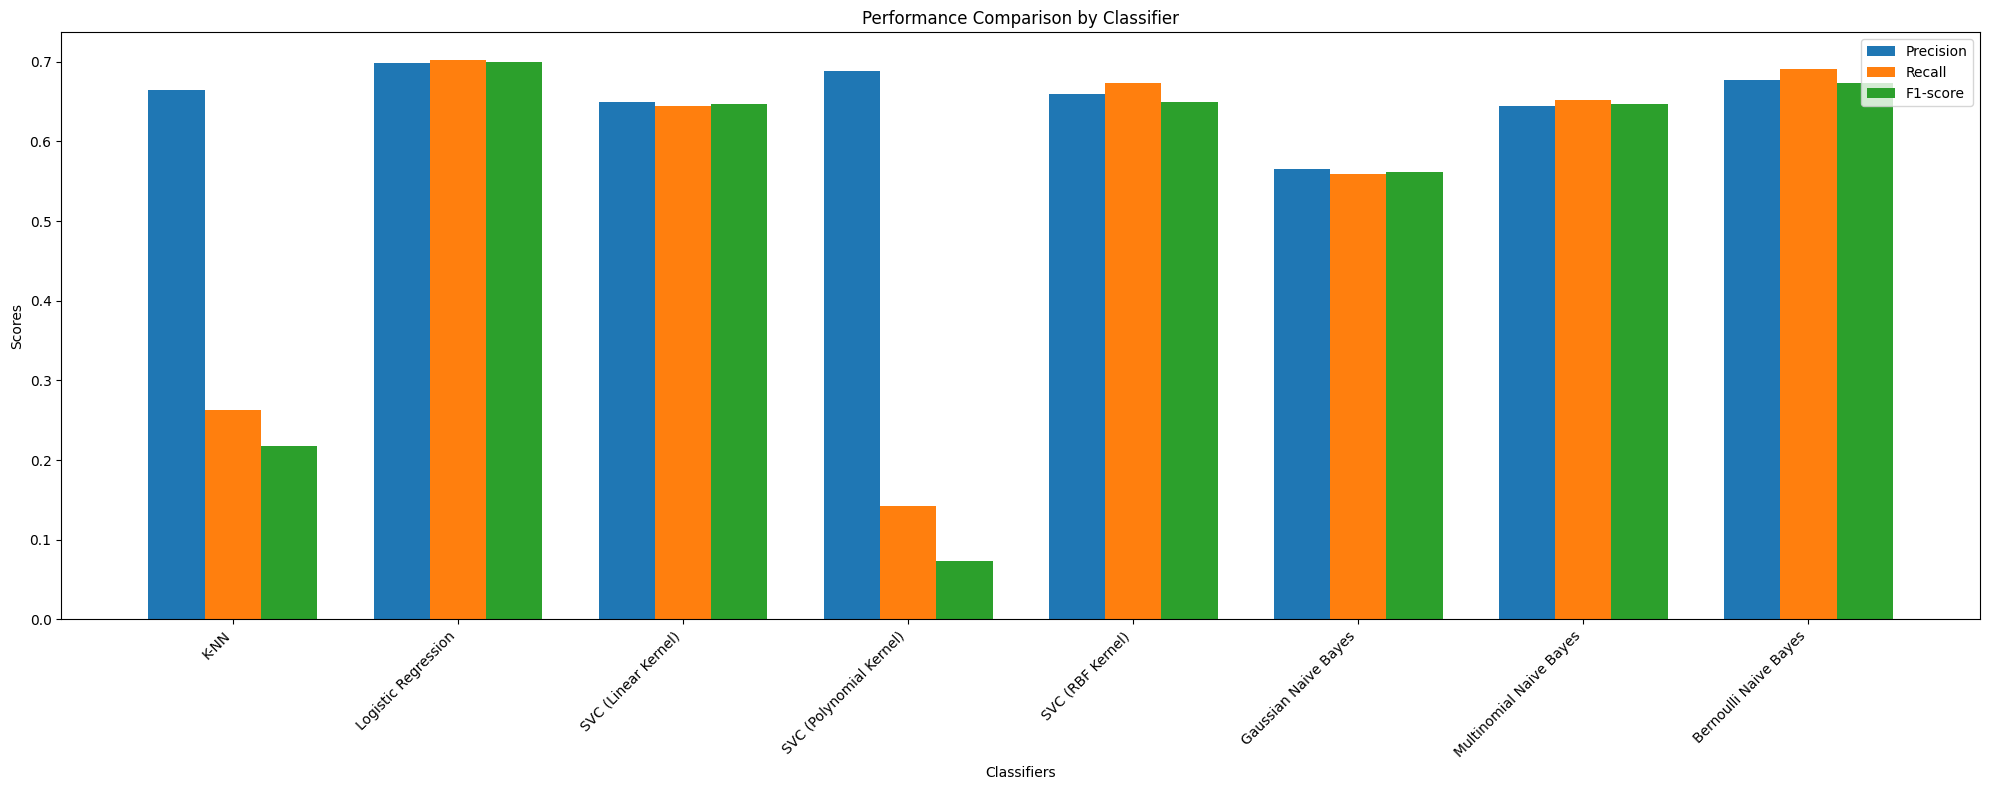

In [91]:
# Define the classifiers and their names
classifiers = [
    "K-NN",
    "Logistic Regression",
    "SVC (Linear Kernel)",
    "SVC (Polynomial Kernel)",
    "SVC (RBF Kernel)",
    "Gaussian Naive Bayes",
    "Multinomial Naive Bayes",
    "Bernoulli Naive Bayes"
]

# Define the corresponding precision, recall, and F1-score for each classifier
precision_scores = [
    precision_score(y_test, y_pred_knn, average='weighted'),
    precision_score(y_test, y_pred_lr, average='weighted'),
    precision_score(y_test, y_pred_svc_linear, average='weighted'),
    precision_score(y_test, y_pred_svc_poly, average='weighted'),
    precision_score(y_test, y_pred_svc_rbf, average='weighted'),
    precision_score(y_test, y_pred_gnb, average='weighted'),
    precision_score(y_test, y_pred_mnb, average='weighted'),
    precision_score(y_test, y_pred_bnb, average='weighted')
]

recall_scores = [
    recall_score(y_test, y_pred_knn, average='weighted'),
    recall_score(y_test, y_pred_lr, average='weighted'),
    recall_score(y_test, y_pred_svc_linear, average='weighted'),
    recall_score(y_test, y_pred_svc_poly, average='weighted'),
    recall_score(y_test, y_pred_svc_rbf, average='weighted'),
    recall_score(y_test, y_pred_gnb, average='weighted'),
    recall_score(y_test, y_pred_mnb, average='weighted'),
    recall_score(y_test, y_pred_bnb, average='weighted')
]

f1_scores = [
    f1_score(y_test, y_pred_knn, average='weighted'),
    f1_score(y_test, y_pred_lr, average='weighted'),
    f1_score(y_test, y_pred_svc_linear, average='weighted'),
    f1_score(y_test, y_pred_svc_poly, average='weighted'),
    f1_score(y_test, y_pred_svc_rbf, average='weighted'),
    f1_score(y_test, y_pred_gnb, average='weighted'),
    f1_score(y_test, y_pred_mnb, average='weighted'),
    f1_score(y_test, y_pred_bnb, average='weighted')
]

# Create a bar plot
x = np.arange(len(classifiers))
width = 0.25

fig, ax = plt.subplots(figsize=(20, 8))
bar1 = ax.bar(x - width, precision_scores, width, label='Precision')
bar2 = ax.bar(x, recall_scores, width, label='Recall')
bar3 = ax.bar(x + width, f1_scores, width, label='F1-score')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison by Classifier')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()


ROC AUC for class negative: 0.6442699317788413
ROC AUC for class neutral: 0.5723545886941295
ROC AUC for class positive: 0.5856435611316306


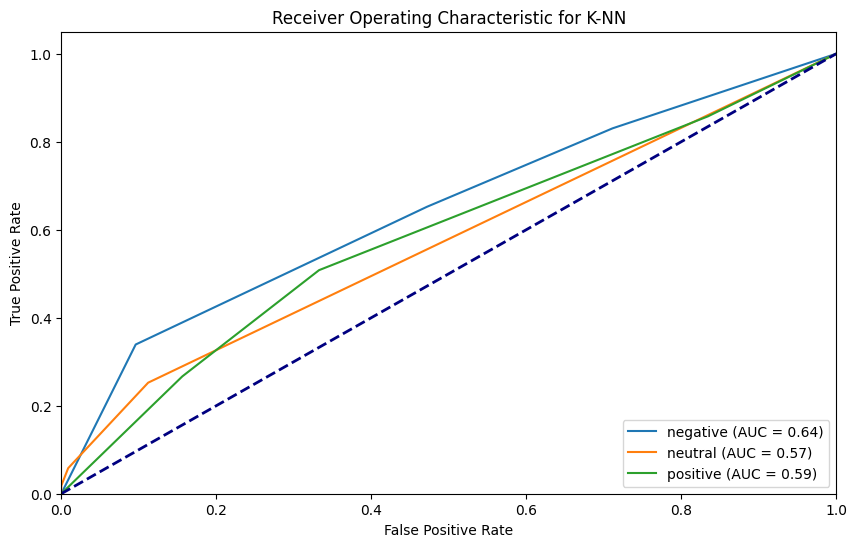

In [92]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC AUC for the K-NN model
y_prob_knn = knn_pipeline.predict_proba(X_test_tfidf)
n_classes = y_prob_knn.shape[1]

roc_auc_knn = []

for i in range(n_classes):
    roc_auc_knn.append(roc_auc_score(y_test == knn_pipeline.classes_[i], y_prob_knn[:, i]))

# Print ROC AUC scores for K-NN
for i, sentiment in enumerate(knn_pipeline.classes_):
    print(f"ROC AUC for class {sentiment}: {roc_auc_knn[i]}")

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(knn_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test == sentiment, y_prob_knn[:, i])
    plt.plot(fpr, tpr, label=f'{sentiment} (AUC = {roc_auc_knn[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for K-NN')
plt.legend(loc="lower right")

plt.show()


ROC AUC for class negative: 0.8705707158130536
ROC AUC for class neutral: 0.8035620176664586
ROC AUC for class positive: 0.7923120517480604


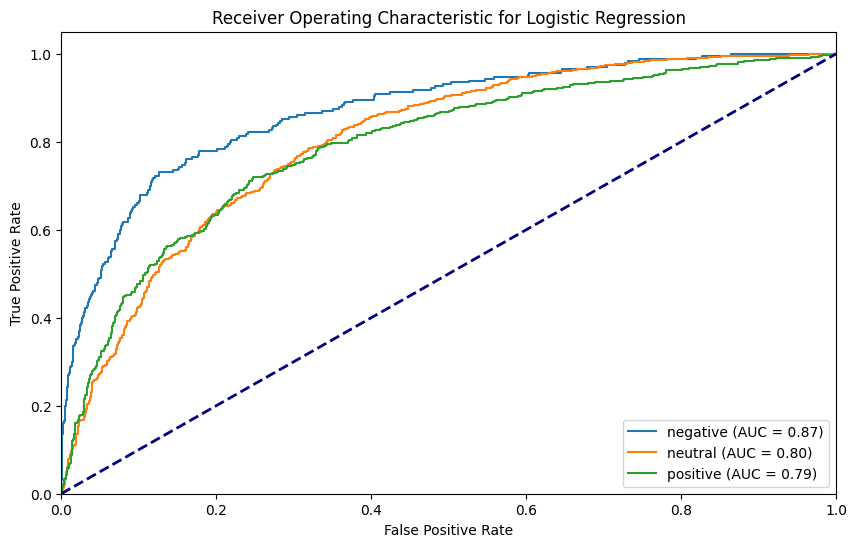

In [93]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


y_prob_lr = LR_pipeline.predict_proba(X_test_tfidf)
n_classes = y_prob_lr.shape[1]
roc_auc_lr = []

for i in range(n_classes):
    roc_auc_lr.append(roc_auc_score(y_test == LR_pipeline.classes_[i], y_prob_lr[:, i]))

# Print ROC AUC scores for K-NN
for i, sentiment in enumerate(LR_pipeline.classes_):
    print(f"ROC AUC for class {sentiment}: {roc_auc_lr[i]}")

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(LR_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test == sentiment, y_prob_lr[:, i])
    plt.plot(fpr, tpr, label=f'{sentiment} (AUC = {roc_auc_lr[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


SVC (Linear Kernel) ROC AUC for class negative: 0.85
SVC (Linear Kernel) ROC AUC for class neutral: 0.75
SVC (Linear Kernel) ROC AUC for class positive: 0.74


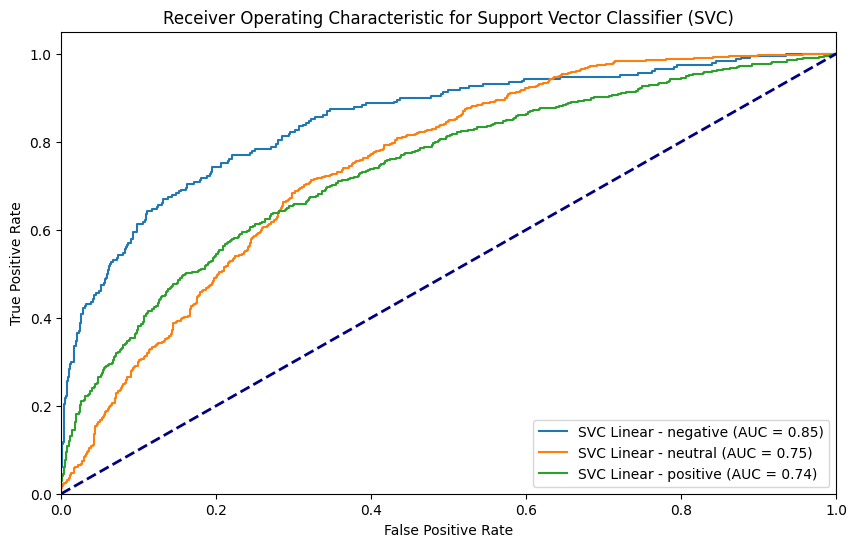

In [94]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Calculate ROC AUC for each class for SVC with linear kernel
n_classes_linear = svc_linear_pipeline.classes_.shape[0]
y_prob_svc_linear = svc_linear_pipeline.decision_function(X_test_tfidf)

roc_auc_svc_linear = []
for i in range(n_classes_linear):
    fpr, tpr, _ = roc_curve(y_test == svc_linear_pipeline.classes_[i], y_prob_svc_linear[:, i])
    roc_auc_svc_linear.append(auc(fpr, tpr))

# Print ROC AUC scores for each class in each SVC pipeline
for i, sentiment in enumerate(svc_linear_pipeline.classes_):
    print(f"SVC (Linear Kernel) ROC AUC for class {sentiment}: {roc_auc_svc_linear[i]:.2f}")


# Plot ROC curves
plt.figure(figsize=(10, 6))
for i, sentiment in enumerate(svc_linear_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test == sentiment, y_prob_svc_linear[:, i])
    plt.plot(fpr, tpr, label=f'SVC Linear - {sentiment} (AUC = {roc_auc_svc_linear[i]:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Support Vector Classifier (SVC)')
plt.legend(loc="lower right")
plt.show()


SVC (Polynomial Kernel) ROC AUC for class negative: 0.68
SVC (Polynomial Kernel) ROC AUC for class neutral: 0.67
SVC (Polynomial Kernel) ROC AUC for class positive: 0.63


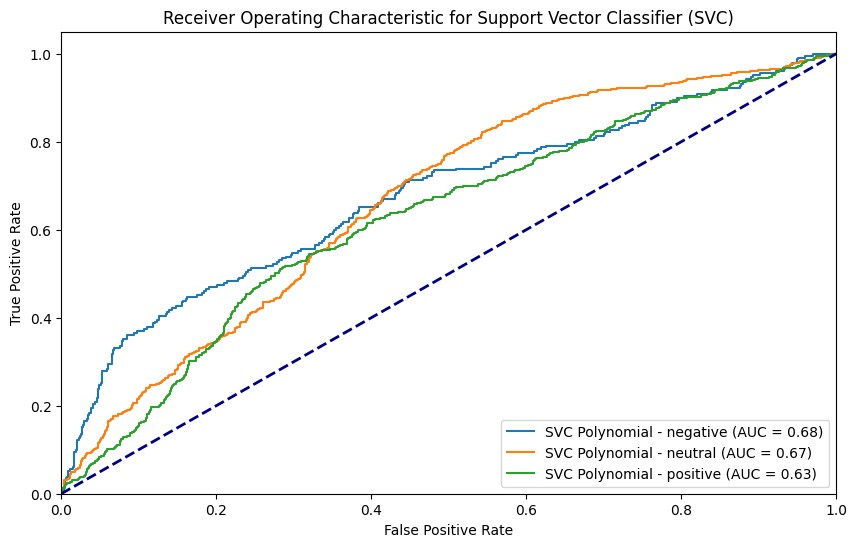

In [95]:



# Calculate ROC AUC for each class for SVC with polynomial kernel
n_classes_poly = svc_poly_pipeline.classes_.shape[0]
y_prob_svc_poly = svc_poly_pipeline.decision_function(X_test_tfidf)

roc_auc_svc_poly = []
for i in range(n_classes_poly):
    fpr, tpr, _ = roc_curve(y_test == svc_poly_pipeline.classes_[i], y_prob_svc_poly[:, i])
    roc_auc_svc_poly.append(auc(fpr, tpr))


# Print ROC AUC scores for each class in each SVC pipeline

for i, sentiment in enumerate(svc_poly_pipeline.classes_):
    print(f"SVC (Polynomial Kernel) ROC AUC for class {sentiment}: {roc_auc_svc_poly[i]:.2f}")


# Plot ROC curves
plt.figure(figsize=(10, 6))


for i, sentiment in enumerate(svc_poly_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test == sentiment, y_prob_svc_poly[:, i])
    plt.plot(fpr, tpr, label=f'SVC Polynomial - {sentiment} (AUC = {roc_auc_svc_poly[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Support Vector Classifier (SVC)')
plt.legend(loc="lower right")
plt.show()


SVC (RBF Kernel) ROC AUC for class negative: 0.74
SVC (RBF Kernel) ROC AUC for class neutral: 0.70
SVC (RBF Kernel) ROC AUC for class positive: 0.76


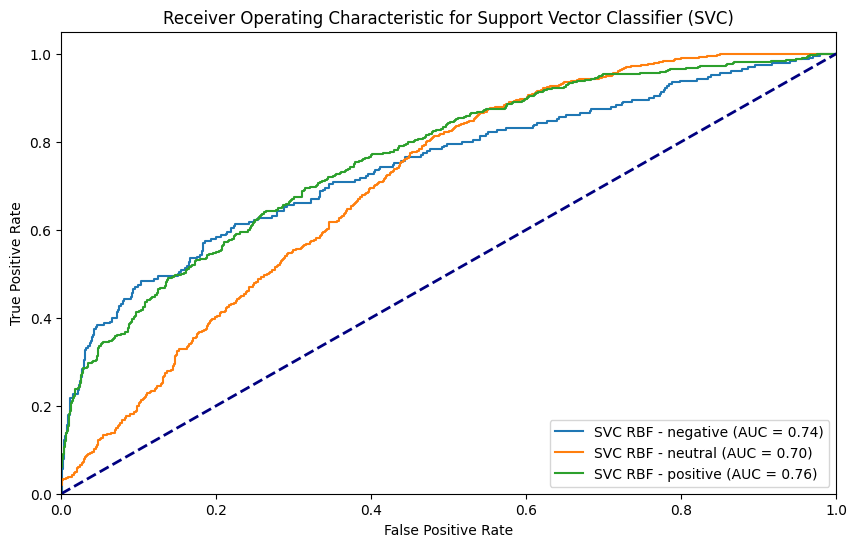

In [96]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


# Calculate ROC AUC for each class for SVC with RBF kernel
n_classes_rbf = svc_rbf_pipeline.classes_.shape[0]
y_prob_svc_rbf = svc_rbf_pipeline.decision_function(X_test_tfidf)

roc_auc_svc_rbf = []
for i in range(n_classes_rbf):
    fpr, tpr, _ = roc_curve(y_test == svc_rbf_pipeline.classes_[i], y_prob_svc_rbf[:, i])
    roc_auc_svc_rbf.append(auc(fpr, tpr))


for i, sentiment in enumerate(svc_rbf_pipeline.classes_):
    print(f"SVC (RBF Kernel) ROC AUC for class {sentiment}: {roc_auc_svc_rbf[i]:.2f}")


# Plot ROC curves
plt.figure(figsize=(10, 6))

for i, sentiment in enumerate(svc_rbf_pipeline.classes_):
    fpr, tpr, _ = roc_curve(y_test == sentiment, y_prob_svc_rbf[:, i])
    plt.plot(fpr, tpr, label=f'SVC RBF - {sentiment} (AUC = {roc_auc_svc_rbf[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Support Vector Classifier (SVC)')
plt.legend(loc="lower right")
plt.show()


In [97]:
from sklearn.metrics import roc_auc_score
import numpy as np

# Define the classifiers and their names
classifiers = [gnb, mnb, bnb]
classifier_names = ['Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes']

# Initialize a list to store ROC AUC scores
roc_auc_scores = []


# Convert sparse matrix to dense array
X_test_tfidf_dense = X_test_tfidf.toarray()

# Calculate ROC AUC for each classifier and print the results
for i, classifier in enumerate(classifiers):
    y_prob = classifier.predict_proba(X_test_tfidf_dense)
    
    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
    roc_auc_scores.append(roc_auc)

# Print ROC AUC scores for each classifier and class
class_labels = np.unique(y_test)
for i, name in enumerate(classifier_names):
    for label in class_labels:
        label_index = np.where(y_test == label)
        label_roc_auc = roc_auc_scores[i]
        print(f'{name} ROC AUC for class {label}: {label_roc_auc:.2f}')
        
   


Gaussian Naive Bayes ROC AUC for class negative: 0.61
Gaussian Naive Bayes ROC AUC for class neutral: 0.61
Gaussian Naive Bayes ROC AUC for class positive: 0.61
Multinomial Naive Bayes ROC AUC for class negative: 0.77
Multinomial Naive Bayes ROC AUC for class neutral: 0.77
Multinomial Naive Bayes ROC AUC for class positive: 0.77
Bernoulli Naive Bayes ROC AUC for class negative: 0.78
Bernoulli Naive Bayes ROC AUC for class neutral: 0.78
Bernoulli Naive Bayes ROC AUC for class positive: 0.78


In [98]:
from sklearn.metrics import accuracy_score

# Define the true labels for your test dataset
true_labels = y_test

# Define the predicted labels for each classifier
predicted_labels = [
    y_pred_gnb, y_pred_mnb, y_pred_bnb, 
    y_pred_svc_linear, y_pred_svc_poly, y_pred_svc_rbf,
    y_pred_lr, y_pred_knn
]

classifier_names = [
    'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes',
    'SVC (Linear Kernel)', 'SVC (Polynomial Kernel)', 'SVC (RBF Kernel)',
    'Logistic Regression (lr)', 'k-Nearest Neighbors (knn)'
]

# Calculate and print accuracy for each classifier
for i, labels in enumerate(predicted_labels):
    accuracy = accuracy_score(true_labels, labels)
    print(f'{classifier_names[i]} Accuracy: {accuracy:.2f}')


Gaussian Naive Bayes Accuracy: 0.56
Multinomial Naive Bayes Accuracy: 0.65
Bernoulli Naive Bayes Accuracy: 0.69
SVC (Linear Kernel) Accuracy: 0.64
SVC (Polynomial Kernel) Accuracy: 0.14
SVC (RBF Kernel) Accuracy: 0.67
Logistic Regression (lr) Accuracy: 0.70
k-Nearest Neighbors (knn) Accuracy: 0.26
